<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW5/Problem2Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem 2***

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error




In [2]:
#read in data set 
wfa = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")


In [3]:
#checking for missing values 
wfa.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

**Changing Text values to numerical values**

In [4]:
#encoding data frame 
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wfaDF = pd.DataFrame()

for i in range(0, wfa.shape[1]):
    if wfa.dtypes[i]=='object' or wfa.dtypes[i]=='bool':
        encoded_wfaDF[wfa.columns[i]] = le.fit_transform(wfa[wfa.columns[i]])



print("-=========================")
print(wfa)
print("-=========================")
encoded_wfaDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


In [5]:
#contingency tables (Type vs. alcohol content)
type_alc = pd.crosstab(wfa['Type'], wfa['Alcohol_flag'], margins = True)
type_alc


Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


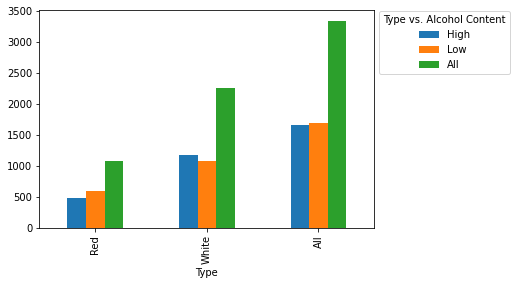

In [6]:
#cross tabulations plot (Type vs. alcohol content)
taPlot = type_alc.plot(kind = "bar", stacked = False)
taPlot.legend(title = 'Type vs. Alcohol Content', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [7]:
#contingency tables (Type vs. Sugar content)
type_sugar = pd.crosstab(wfa['Type'], wfa['Sugar_flag'], margins = True)
type_sugar


Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


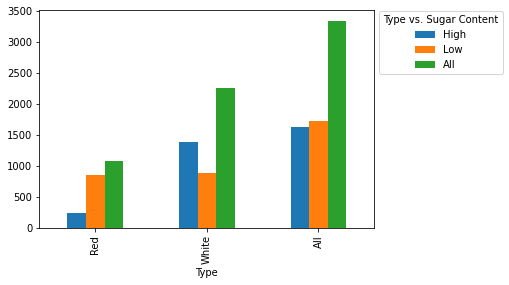

In [8]:
#cross tabulations plot (Type vs. Sugar content)
tsPlot = type_sugar.plot(kind = "bar", stacked = False)
tsPlot.legend(title = 'Type vs. Sugar Content', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [9]:
#probility
#red 
pRed = 1085/3345

#white 
pWhite = 2260/3345

#high alcohol content
pHA = 1661/3345

#low alcohol content
pLA = 1684/3345

#high sugar content
pHS = 1619/3345

#low sugar content
pLS = 1726/3345

#p(Alcohol_flag = High ∣ Type = Red)
pHAR = ((485/1661)*pRed)/pHA

#p(Alcohol_flag = Low ∣ Type = Red)
pLAR = ((600/1684)*pRed)/pLA

#p(Sugar_flag = High ∣ Type = Red)
pHSR = ((237/1619)*pRed)/pHS

#p(Sugar_flag = Low ∣ Type = Red).
pLSR = ((848/1726)*pRed)/pLS

#printing results 
print("probility of Type = Red:  %.4f"%(pRed))
print("probility of Type = White: %.4f"%(pWhite))

print("\nprobility of High Alcohol Content:  %.4f"%(pHA))
print("probility of Low Alcohol Content: %.4f"%(pLA))

print("\nprobility of High Sugar Content:  %.4f"%(pHS))
print("probility of Low Sugar Content: %.4f"%(pLS))

print("\n\nprobility of High Alcohol Content and Type = Red:  %.4f"%(pHAR))
print("probility of Low Alcohol Content and Type = Red: %.4f"%(pLAR))

print("\nprobility of High Sugar Content and Type = Red:  %.4f"%(pHSR))
print("probility of Low Sugar Content and Type = Red: %.4f"%(pLSR))




probility of Type = Red:  0.3244
probility of Type = White: 0.6756

probility of High Alcohol Content:  0.4966
probility of Low Alcohol Content: 0.5034

probility of High Sugar Content:  0.4840
probility of Low Sugar Content: 0.5160


probility of High Alcohol Content and Type = Red:  0.1907
probility of Low Alcohol Content and Type = Red: 0.2296

probility of High Sugar Content and Type = Red:  0.0981
probility of Low Sugar Content and Type = Red: 0.3088


In [10]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()
 
# Prepare input and output for learning
X = encoded_wfaDF.iloc[:,1:] #Alcohol flag, Sugar flag
y = encoded_wfaDF["Type"] #type


***80% test 20% Test***

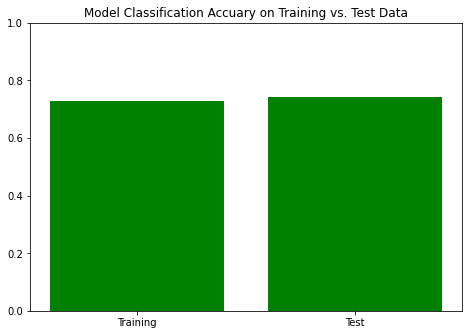

Training: 0.7285
Test: 0.7407


In [22]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1)
plt.show()

#print accuracy of the training set and the test set
print("Training: %.4f" %scores[0])
print("Test: %.4f" %scores[1])

***75% Train 25% Test***

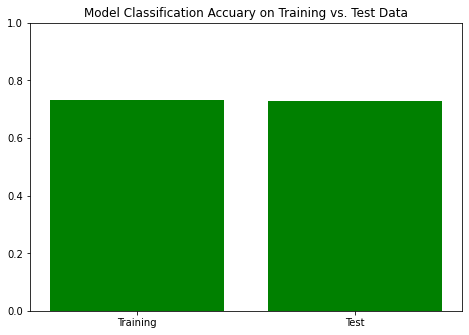

Training: 0.7321
Test: 0.7300


In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, test_size=0.25, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1)
plt.show()

#print accuracy of the training set and the test set
print("Training: %.4f" %scores[0])
print("Test: %.4f" %scores[1])

***70% Train 30% Test***

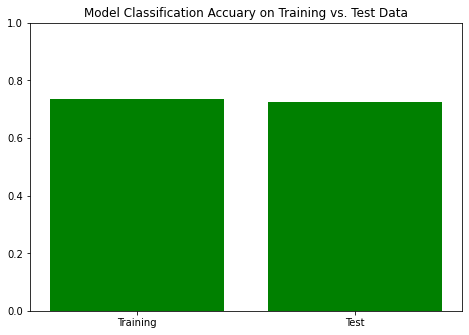

Training: 0.7339
Test: 0.7261


In [25]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1)
plt.show()

#print accuracy of the training set and the test set
print("Training: %.4f" %scores[0])
print("Test: %.4f" %scores[1])

***60% Train 40% Test***

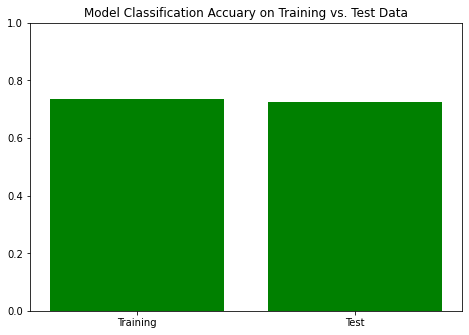

Training: 0.7364
Test: 0.7242


In [26]:
#60-40
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.4, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1)
plt.show()

#print accuracy of the training set and the test set
print("Training: %.4f" %scores[0])
print("Test: %.4f" %scores[1])

***50% Train 50% Test***

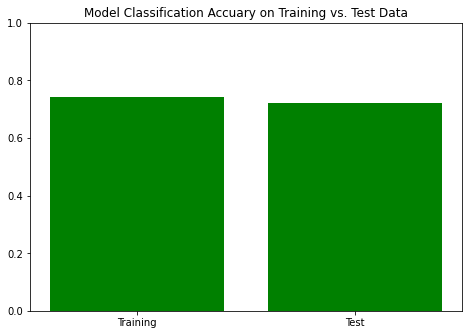

Training: 0.7416
Test: 0.7215


In [32]:
#50-50
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, test_size=0.50, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1.0)
plt.show()

#print accuracy of the training set and the test set
print("Training: %.4f" %scores[0])
print("Test: %.4f" %scores[1])

***Summary:***
compleating these test gave me a pretty good insite into how supervised testing is done. these test also showed me that the more data there is in the data set the closer the traing set will be to the test set in results. That being said this data set was decently sized with 3306 entries so the results per test were fairly close. Although I did see that test where training set were large had a higer accurcy then test were traing sets were small. For example 80 20 test traing the test accuracy was higher then the training accurcy (Training: 0.7285 Test: 0.7407), and in the 50 50 test training was higher then test (Training: 0.7416 Test: 0.7215)
